# k-means Clustering

Une possibilité est d'étiqueter chaque point avec le nom du cluster dans lequel il se trouve. S'il y a k clusters, ces étiquettes peuvent être les entiers $1$ à $k$, où l'étiquetage du point $p$ avec $i$ signifie qu'il est dans le $i$ème cluster. 

L'objectif du k-means clustering est de regrouper les observations d'un ensemble de données en $K$ clusters disjoints dans lesquels les observations sont relativement homogènes. Le nombre de clusters $K$ est déterminé au préalable, après quoi l'algorithme recherche automatiquement la meilleure configuration des $K$ clusters.

Le clustering k-means est une approche rapide, simple à comprendre et généralement efficace du clustering. Elle commence par deviner où pourraient se trouver les centres des clusters, évalue la qualité de ces centres, puis les affine pour obtenir de meilleures estimations des centres.

La procédure de clustering K-means résulte d'un problème mathématique simple et intuitif. Nous commençons par définir quelques notations. Soit $C_{1}, \ldots, C_{K}$ désignent les ensembles contenant les indices des observations dans chaque cluster. Ces ensembles satisfont deux propriétés :

1. $C_{1} \cup C_{2} \cup \ldots \cup C_{K}=\{1, \ldots, n\} .$ En d'autres termes, chaque observation appartient à au moins un des $K$ clusters.
2. $C_{k} \cap C_{k^{\prime}}=\emptyset$ for all $k \neq k^{\prime} .$ En d'autres termes, les clusters ne se chevauchent pas : aucune observation n'appartient à plus d'un cluster.

Par exemple, si l'observation $i$ se trouve dans le cluster $k$ , alors $i \in C_{k} .$ L'idée derrière le k-means clustering est qu'un bon clustering est celui pour lequel la variation intra-cluster est aussi petite que possible. 

La variation intra-cluster pour luster $C_{k}$ est une mesure $W\left(C_{k}\right)$ de la quantité de différences entre les observations au sein d'un cluster. Par conséquent, nous voulons résoudre le problème suivant:

$$\underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} W\left(C_{k}\right)\right\}$$

En d'autres termes, cette formule indique que nous voulons répartir les observations en $K$ clusters de telle sorte que la variation totale au sein du cluster, additionnée à toutes les $K$ clusters, soit aussi faible que possible.

Résoudre: $\underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} W\left(C_{k}\right)\right\}$ semble être une idée raisonnable, mais pour la rendre applicable, nous devons définir la variation intra-cluster. Il existe de nombreuses façons de définir ce concept, mais le choix le plus courant concerne la distance euclidienne au carré. Autrement dit, nous définissons

$$W\left(C_{k}\right)=\frac{1}{\left|C_{k}\right|} \sum_{i, i^{\prime} \in C_{k}} \sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^{2}$$

où $\left|C_{k}\right|$ désigne le nombre d'observations dans le $k$ ème cluster. 

En d'autres termes, la variation à l'intérieur d'un cluster pour le cluster $k$ est la somme de tous les carrés des distances euclidiennes par paire entre les observations de du cluster $k$, divisée par le nombre total d'observations du cluster $k$. En combinant (10.9) et (10.10), on obtient le problème d'optimisation qui définit la classification des moyennes $K$.

$$\operatorname{minimize}_{C_{1}, \ldots, C_{K}}\left\{\sum_{k=1}^{K} \frac{1}{\left|C_{k}\right|} \sum_{i, i^{\prime} \in C_{k}} \sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^{2}\right\}$$

## Algorithme K-Means Clustering

1. Assigner aléatoirement un nombre, de 1 à $K$, à chacune des observations. Ces chiffres servent d'affectations initiales des clusters pour les observations.
2. Itérer jusqu'à ce que les affectations de cluster cessent de changer :
    
    (a) Pour chacun des $K$ clusters, calculer le centroïde du cluster. Le $k$ème centroïde de cluster est le vecteur des $p$ moyennes de caractéristiques pour les observations dans le $k$ème cluster.

    (b) Assigner chaque observation au cluster dont le centroïde est le plus proche (où le plus proche est défini en utilisant la distance euclidienne).

![](https://www.projectrhea.org/rhea/images/e/ef/RunyanKmeans.gif)

Étant donné que l'algorithme K-means trouve un minimum local locale plutôt que globale, les résultats obtenus dépendront de l'affectation initiale (aléatoire) des clusters de chaque observation à l'étape 1 de l'algorithme 10.1. Pour cette raison, il est important d'exécuter l'algorithme plusieurs fois à partir de différentes configurations initiales aléatoires. On sélectionne ensuite la meilleure solution, c'est-à-dire celle pour laquelle l'objectif (10.11) est le plus petit.

## Exemple 1:

Considérons un cluster avec les trois observations suivantes :
$$
\mathbf{x}_{1}=(1,1,1), \quad \mathbf{x}_{2}=(1,2,1), \quad \mathbf{x}_{3}=(2,1,2)
$$
Calculez la variation intra-groupe (définie par la distance euclidienne au carré).

Solution. Nous devons d'abord déterminer la distance euclidienne au carré entre chaque paire d'observations. Pour simplifier, désignons la distance euclidienne au carré entre l'observation $\mathbf{X}_{i}$ et $\mathbf{x}_{i^{\prime}}$ par $d_{i i^{\prime}}^{2}$. Notez que $d_{i i}=0$ et $d_{i i^{\prime}}=d_{i^{\prime} i}$ pour tout $i, i^{\prime}=1,2,3,$ il suffit donc de déterminer $d_{i i^{\prime}}$ pour $1 \leq i<i^{\prime} \leq 3 .$ Les calculs directs donnent

$d_{12}^{2}=(1-1)^{2}+(1-2)^{2}+(1-1)^{2}=1$

$d_{13}^{2}=(1-2)^{2}+(1-1)^{2}+(1-2)^{2}=2$

$d_{23}^{2}=(1-2)^{2}+(2-1)^{2}+(1-2)^{2}=3$

à partir $(10.10)$ avec $\left|C_{k}\right|=3$, la variation intra-cluster est
$$
W\left(C_{k}\right)=\frac{1}{3} \sum_{i=1}^{3} \sum_{i^{\prime}=1}^{3} d_{i i^{\prime}}^{2}=\frac{1}{3}\left(d_{12}^{2}+d_{13}^{2}+d_{21}^{2}+d_{23}^{2}+d_{31}^{2}+d_{32}^{2}\right)
$$

In [34]:
from scipy.spatial import distance
x_1 = (1, 1, 1)
x_2 = (1, 2, 1)
x_3 = (2, 1, 2)

In [35]:
d_1_2= (distance.euclidean(x_1, x_2))**2

In [36]:
d_1_3= (distance.euclidean(x_1, x_3))**2

In [37]:
d_2_3= (distance.euclidean(x_2, x_3))**2

Calculez la variation intra-groupe (définie par la distance euclidienne au carré).

In [38]:
W_c=(2*d_1_2+2*d_1_3+2*d_2_3)/3
W_c

4.0

## Exemple 2

Créons 200 points iid distribués aléatoirement $\sim \mathcal{N}(0,1)$

In [39]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np
np.random.seed(2)
X = np.random.standard_normal((200,2))
X[:100,0] = X[:100,0]+3
X[:100,1] = X[:100,1]-4

### Deux clusters

In [3]:
from sklearn.cluster import KMeans

In [4]:
km2 = KMeans(n_clusters=2, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Trois clusters

In [5]:
np.random.seed(4)
km3 = KMeans(n_clusters=3, n_init=20)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Quatre clusters

In [6]:
np.random.seed(4)
km4 = KMeans(n_clusters=4, n_init=20)
km4.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Reproduisons l'exemple du livre**

In [7]:
import matplotlib.pyplot as plt

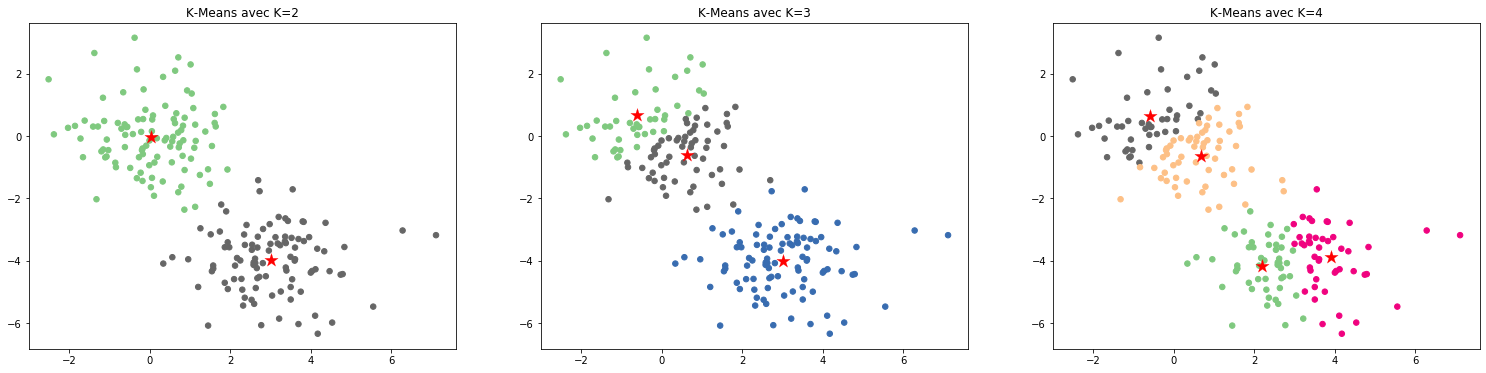

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(26,6))

ax1.scatter(X[:,0], X[:,1], s=30, c=km2.labels_, cmap=plt.cm.Accent) 
ax1.set_title('K-Means avec K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='*', s=200, c='r', linewidth=.2)

ax2.scatter(X[:,0], X[:,1], s=30, c=km3.labels_, cmap=plt.cm.Accent) 
ax2.set_title('K-Means avec K=3')
ax2.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker='*', s=200, c='r', linewidth=.2);

ax3.scatter(X[:,0], X[:,1], s=30, c=km4.labels_, cmap=plt.cm.Accent) 
ax3.set_title('K-Means avec K=4')
ax3.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], marker='*', s=200, c='r', linewidth=.2);

Il est possible de trouver les valeurs des centroides

In [10]:
km4.cluster_centers_[:,1]

array([-4.18122464, -0.65238891, -3.89348124,  0.65024368])

Durant l'algorithme, chaque point des _training data_ est assigné à un cluster $k$. Nous pouvons identifier à quel _cluster_ $k$ le point $x_i$ apparient comme suit:

In [11]:
print("Cluster memberships:\n{}".format(km4.labels_))

Cluster memberships:
[3 1 3 2 3 2 3 2 2 3 3 2 3 3 3 2 3 2 2 2 3 1 2 2 3 2 3 2 3 3 3 2 3 3 2 3 3
 3 3 2 3 2 3 2 3 2 2 3 2 2 2 3 1 2 3 3 3 3 3 2 3 3 2 2 2 3 3 2 3 2 3 3 2 2
 2 2 3 2 2 2 3 3 2 2 2 2 2 3 2 3 2 3 2 3 2 2 3 1 2 2 0 0 1 0 0 0 1 0 0 1 0
 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0]


## Défaut de la méthode k-means:

La méthode k-means suppose que toutes les directions sont équiprobables.

Regardons un exemple où les données sont clairement séparés sur une diagonale:

Importons des données de scikit-learn:


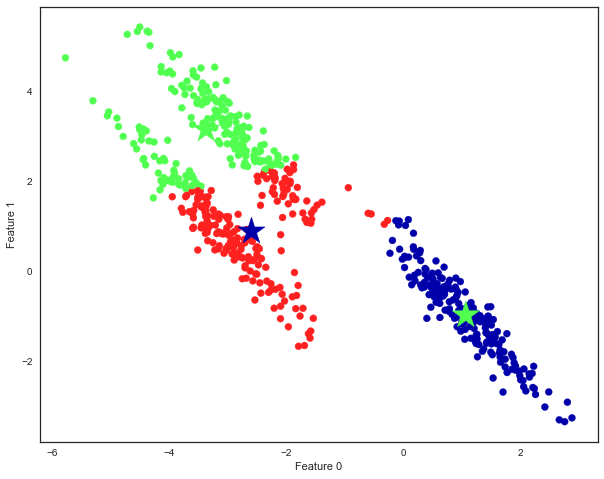

In [12]:
from sklearn.datasets import make_blobs
fig = plt.figure(figsize=(10, 8))
 # Génoron des clusters aléatoir ement
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transformons les données afin de les tirer obliquement
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# Regroupons les données en trois sous-groupe
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)      
# colorer les sous groupes et les centres
# figsize(26,20)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
# marker='*', c=[0, 1, 2], s=800, linewidth=.5, cmap=mglearn.cm3)
marker='*', c=[1, 0, 1], s=800, linewidth=.5, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

## Des formes complexes:


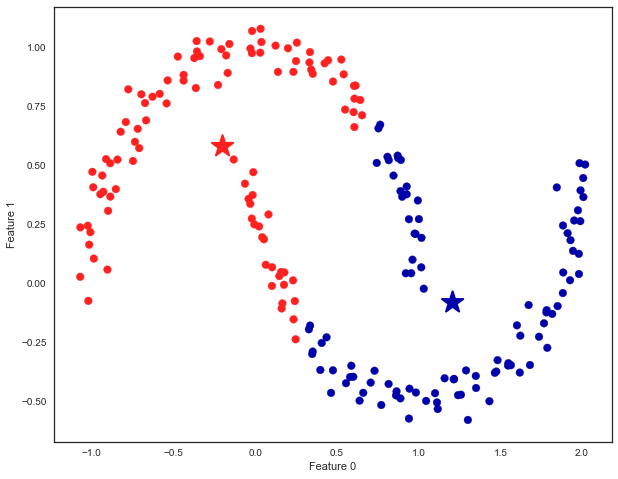

In [13]:
fig = plt.figure(figsize=(10, 8))
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='*', c=[mglearn.cm2(0), mglearn.cm2(1)], s=500, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");


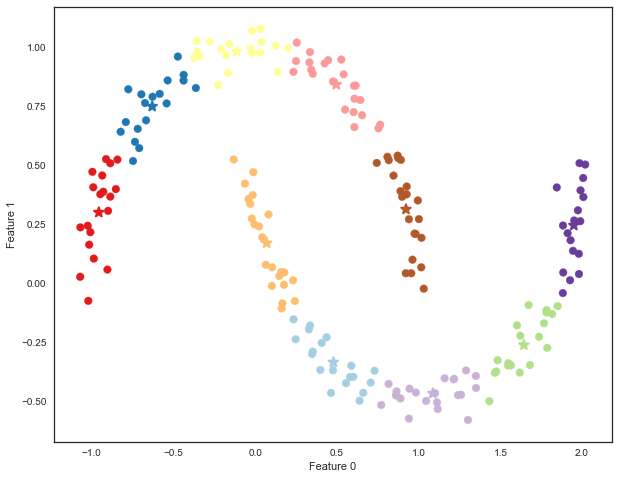

In [14]:
fig = plt.figure(figsize=(10, 8))
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100,
marker='*', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

Nous avons crée 10 _clusters_, ce la veut dire que chaque point appartient à un cluster;  

$$x_i \in k_0, k_1, \dots, k_9$$

In [15]:
print("Cluster memberships:\n{}".format(y_pred))

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


Ensuite, nous pouvons traiter ce problème avec les nootions de **PCA**, comme si nous avons 10 nouveau paramètres que bous voudrons réduire.  

Nous avons maintenant un problème avec représnetation en 10 dimension que nous voudrons réduire.

## Pourquoi utilise-t-on encore cette méthode

* Sa popularité car très facil à comprendre

* Parce-qu'il est très rapide à éxécuter, même sur de grande base de données.

* Lorsque nous avons de **Très** grande base données, il est possible de traiter le problème en sous groupe avec l'algorithme [MiniBatchKMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans)